# Assignment 4: Linear Regression and Gradient Descent

Due date: Sunday, Apr. 14 at 11:59 pm

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

## Scoring Breakdown

|Question|Points|
|---|---|
|1.1|10|
|1.2|10|
|2.1|10|
|2.2|15|
|2.3|15|
|2.4|10|
|**Total**|70|

## Question 1. 
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.1. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

y = 1 * 4 + 2 * 2 + 1 * 1 = 9

### 1.2.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

L2-loss = (y^ - y )^2 = (9-61)^2 = 8.41

## Question 2.

The following function generates the dataset you need for the rest of the questions

In [2]:
import numpy as np
import pandas as pd
# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [3]:
# Example:
data = generate_dataset(gamma=10)
data

,X,Y
0,0.823728,3.461876
1,0.184444,-0.243609
2,0.459670,2.957499
3,0.483174,2.570855
4,0.135556,-1.100739
...,...,...
95,0.548838,4.053571
96,0.311203,2.835511
97,0.019516,-3.461972
98,0.188661,0.306622


### 2.1.

Using the following functions (gradient descent python logic provided in lecture), find the best value of m and b that the gradient descent algorithm can find in 100 iterations with a step initial value of 0.01. 

In [17]:
import numpy as np 
import pandas as pd

def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    data = pd.DataFrame({'X': X, 'Y': Y})
    return data

data = generate_dataset(gamma=10)

def gradient_descent(x, y, m_current=0, b_current=0, iterations=100, initial_value=0.01):
    m = m_current
    b = b_current
    n = len(y)
    for _ in range(iterations):
        y_pred = m * x + b
        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        m -= initial_value * dm
        b -= initial_value * db
    return m, b

# running the gradient descent function
x = data['X']
y_obs = data['Y']
m_final, b_final = gradient_descent(x, y_obs, initial_value=0.01, iterations=100)
m_final, b_final


    


(2.503361820803253, 2.062527008151719)

### 2.2.
Create a plot below showing the fitted simple linear regression model on the observed data . Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model 
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

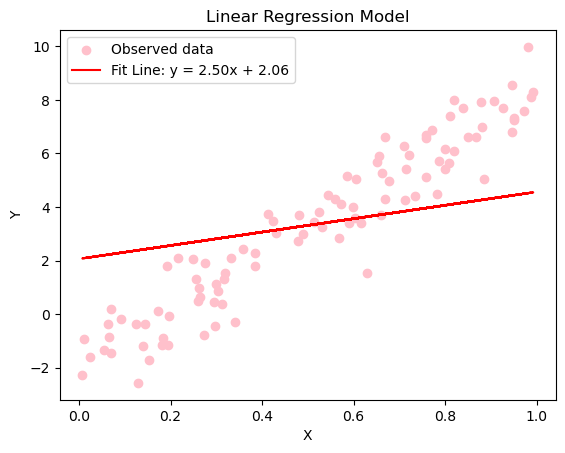

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x, y_obs, color='pink', label='Observed data')

y_pred = m_final * x + b_final
plt.plot(x, y_pred, color='red', label=f'Fit Line: y = {m_final:.2f}x + {b_final:.2f}')

plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


### 2.3.

Use a different value of initial step of 0.001 and iterations 1000 and repeat 2.1 and 2.2.


In [15]:
m_final_low_lr, b_final_low_lr = gradient_descent(x, y_obs, initial_value=0.001, iterations=1000)
m_final_low_lr, b_final_low_lr


(2.16743288940364, 1.7302236320871904)

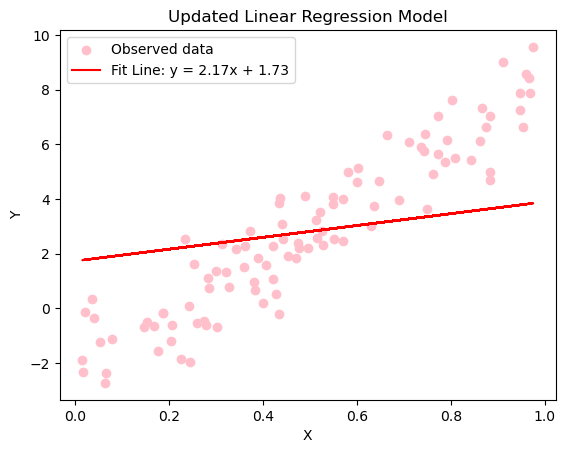

In [16]:
plt.scatter(x, y_obs, color='pink', label='Observed data')

y_pred_low_lr = m_final_low_lr * x + b_final_low_lr
plt.plot(x, y_pred_low_lr, color='red', label=f'Fit Line: y = {m_final_low_lr:.2f}x + {b_final_low_lr:.2f}')

plt.title('Updated Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# display the plot
plt.show()


### 2.4.
Which value of initial step and iteratoins resulted in a better model? Why? 

The results were very close to each other. But initially, the first setting is better becuase it achieved comparable results in fewer iterations

The results were very close to each other. But initially, the first setting is better becuase it achieved comparable results in fewer iterations